In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten
from keras.layers import Dropout, Dense
from keras import backend

from sklearn.datasets import load_files
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import json
import os

Using TensorFlow backend.


In [2]:
def show_image(np_array):
    %matplotlib inline
    plt.figure()
    plt.imshow(np_array, cmap='gray')
    
def show_example(data_set, labels, example_index):
    show_image(data_set[example_index])
    print('Label: ', labels[example_index])

# Loading the images

    x_eq - arrays of pixes of eq's
    x_an - arrays of pixes of an's

In [3]:
# eq_files = sorted(os.listdir("./pics/data"), key=lambda b: int(b[b.find("_")+1:b.find(".")]))
# an_files = sorted(os.listdir("./pics/labels"), key=lambda b: int(b[b.find("_")+1:b.find(".")]))

In [4]:
train = load_files("./pics/", shuffle=False,)

In [5]:
# train.filenames

In [6]:
l = len(train.filenames)//2
border = int(l*0.6)


In [7]:
eq_files = sorted(train.filenames[:l], key=lambda b: int(b[b.find("_")+1:b.find(".j")]))
an_files = sorted(train.filenames[l:], key=lambda b: int(b[b.find("_")+1:b.find(".j")]))

In [8]:
x_eq = np.array([np.array(load_img(fname, grayscale=True)) for fname in  eq_files])
x_an = np.array([np.array(load_img(fname, grayscale=True)) for fname in  an_files])
# train_x = np.array([np.array(load_img(fname, grayscale=True)) for fname in  train.filenames[:l]])
# test_x = np.array([np.array(load_img(fname, grayscale=True)) for fname in  train.filenames[l:]])

In [9]:
# x_eq

1 - correct answer

0 - wrong

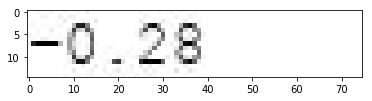

In [10]:
show_image(x_an[-4])

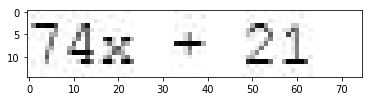

In [11]:
show_image(x_eq[-4])

In [12]:
# labels[-4]

In [13]:
# labels

In [14]:
train_x_eq = x_eq[:border]
test_x_eq = x_eq[border:]
train_x_an = x_an[:border]
test_x_an = x_an[border:]

In [15]:
print(train_x_an.shape, train_x_eq.shape, test_x_an.shape, test_x_eq.shape)

print(test_x_an.shape, test_x_eq.shape)
# print(len(test_y))

(6000, 15, 75) (6000, 15, 75) (4000, 15, 75) (4000, 15, 75)
(4000, 15, 75) (4000, 15, 75)


data_labels - array with eq and 1/0 if correspondent answer is correct/wrong

In [16]:
with open("./pics/binary_labels.json") as datafile_labels:
    data_labels = json.load(datafile_labels)

In [17]:
lst = [v for v in data_labels.values()]
sum(lst)

4957

In [18]:
labels = [data_labels[i] for i in data_labels]

In [19]:
# # labels = [data_labels[train.filenames[i]] for i in range(len(train_x_eq))]
# labels = []
# v = list(data_labels.items())
# for i in range(len(train_x_eq)):
# #     print(i)
#     labels.append(v[i][1])

# #     labels.append(data_labels[train.filenames[i]])


In [20]:

    
train_y = labels[:border]
test_y = labels[border:]

In [21]:
train_x = []
for i in range(len(train_x_eq)):
    res = np.append(train_x_eq[i], train_x_an[i], axis=0)
    train_x.append(res.reshape(2, 15, 75))
train_x = np.array(train_x)
print(train_x[1][0])


[[255 246 247 ..., 255 255 255]
 [242 255 255 ..., 255 255 255]
 [255 255 229 ..., 255 255 255]
 ..., 
 [255 246 255 ..., 255 255 255]
 [255 234 255 ..., 255 255 255]
 [251 255 249 ..., 255 255 255]]


In [22]:
# # for i in range(print(train_x[0][0][1]== train_x_eq[0][10])
# train_x_eq[0][0]
# for i in train_x_eq[0]:
#     if(i == train_x[0][0][i]):
#         print("fnwd")
# print(train_x[0][0])
# print(train_x_eq[0]
# for i in range(len(train_x_eq[0])):
#     print(train_x[4999][0][i] == train_x_eq[4999][i])
        
# train_x_eq[0].shape

In [23]:
test_x = []
for i in range(len(test_x_an)):
    tres = np.append(test_x_eq[i], test_x_an[i], axis=0)
    test_x.append(tres.reshape(2, 15, 75))
    
test_x = np.array(test_x)
test_x.shape

(4000, 2, 15, 75)

In [24]:
# # show_image(tensor_list[4999][0]) # перший індек - номер прикладу, другий: 0 - рівняння, 1 - відповідь
# # show_example(tensor_list[1], labels, 1) # tensor_list[і] - і-ий приклад,
#                 # ост. арг. 1 - img рівняння, 0 - img відповіді, + виводить label  (1\0 відповідно чи правильна відповідь чи ні)

# # show_example(x_eq, labels, example_index = 0)
# # show_example(x_an, labels, example_index = 0)
# # show_example(x_eq, labels, example_index = 8)
# show_image(train_x[1212][0])
# # print(show_example(train_x[3321], train_y, 0))

In [25]:
lst = [v for v in train_y]
sum(lst)

2957

## Preprocessing

In [26]:
# x_eq = x_eq.reshape(x_eq.shape[0], 1, 50, 200)
# x_an = x_an.reshape(x_an.shape[0], 1, 50, 200)
# train_x = train_x.reshape(train_x.shape[0], 2, 15, 75)
# print(train_y.shape)
train_y = np_utils.to_categorical(train_y, 2)


# tensor_list.shape

In [27]:
test_x = test_x.reshape(test_x.shape[0], 2, 15, 75)
test_y = np_utils.to_categorical(test_y, 2)

In [28]:
# x_eq = x_eq.astype('float32')
# x_eq = x_eq/255

# x_an = x_an.astype('float32')
# x_an = x_an/255

train_x = train_x.astype('float32')
train_x = train_x/255

test_x = test_x.astype('float32')
test_x = test_x/255

In [29]:
# print(x_eq.shape)
# print(tensor_list.shape)
# tensor_list[0].shape

In [30]:
if backend.image_data_format() == 'channels_first':
    train_x = train_x.reshape(train_x.shape[0], 2, 15, 75)
    test_x = test_x.reshape(test_x.shape[0], 2, 15, 75)
    input_shape = (2, 15, 75)
else:
    train_x = train_x.reshape(train_x.shape[0], 15, 75, 2)
    test_x = test_x.reshape(test_x.shape[0], 15, 75, 2)
    input_shape = (15, 75, 2)

In [31]:
# model = Sequential()
# model.add(Convolution2D(6,(5,5), activation='relu',input_shape=input_shape))
# print (model.output_shape)
# model.add(MaxPooling2D(pool_size=(2,2), data_format="channels_first"))
# # model.add(Dropout(0.25))
# print (model.output_shape)

# model.add(Convolution2D(16,(5,5), activation='relu'))
# print (model.output_shape)
# # model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(MaxPooling2D(pool_size=(2,2), data_format="channels_first"))
# print (model.output_shape)
       
# model.add(Convolution2D(120,(5,5), activation='relu'))

# model.add(Flatten())
# model.add(Dense(84,activation='relu'))
# model.add(Dense(2,activation='softmax'))

In [32]:
model = Sequential()
model.add(Convolution2D(6, (5, 5), activation='tanh', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2), data_format="channels_first"))
model.add(Dropout(0.25))
model.add(Convolution2D(16, (5, 5), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2,2), data_format="channels_first"))
model.add(Dropout(0.5))
model.add(Convolution2D(120, (5, 5), activation='tanh'))

model.add(Flatten())
model.add(Dense(84,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [33]:
model.compile(loss='categorical_crossentropy',
              optimizer='RMSProp',
              metrics=['accuracy'])

# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

In [34]:
print(train_x.shape,  train_y.shape)

print(test_x.shape, test_y.shape)
# print(len(test_y))

(6000, 15, 75, 2) (6000, 2)
(4000, 15, 75, 2) (4000, 2)


In [35]:
# model.fit(train_x, train_y, 
#           batch_size=32, epochs=35, verbose=1, shuffle=True)
model.fit(train_x, train_y, 
          batch_size=32, epochs=35, verbose=1)


Epoch 1/35
6000/6000 [==============================] - 23s - loss: 0.1957 - acc: 0.9098     

KeyboardInterrupt: 

In [ ]:
loss,accuracy = model.evaluate(test_x, test_y, verbose=1)
print("Loss ",loss)
print("Accuracy ", accuracy)

In [ ]:
loss,accuracy = model.evaluate(train_x, train_y, verbose=1)
print("Loss ",loss)
print("Accuracy ", accuracy)

In [ ]:
# train.filenames[0]
# pickle.load(open(train.filenames[0]))
# pickle.load(open('./pics/data/eq_0.jpeg', 'rb'))